# Tests of Periodogram Averaging Module

In [1]:
import numpy as np
import scipy.signal as sig
from scipy.signal.spectral import welch
import matplotlib.pyplot as plt
import sys
# Add the folder path to the sys.path list
sys.path.append('../helpers/')
from per_averaging import periodogram_averaging
from periodogram import periodogram

## Generate random signal

In [2]:
data = np.random.rand(5000)

### Calculate normal periodogram

In [3]:
f_normal, periodogram_normal = sig.periodogram(data, window='hann')

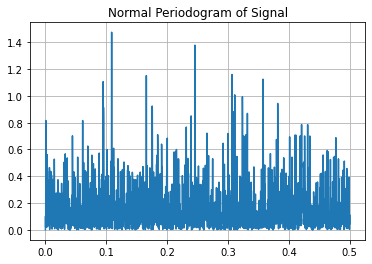

In [4]:
plt.plot(f_normal, periodogram_normal)
plt.title('Normal Periodogram of Signal')
plt.grid()
plt.show()

## Test without overlap

In [5]:
L = 100
N = len(data)
K = 50
D = int(round(N/K))

### Calculate averaged periodogram

In [6]:
# Custom periodogram averaging function
f_manual, manual_averaging = periodogram_averaging(data,K,L, window="hann")

# Scipy periodogram averaging function
f, Pxx = welch(data, nperseg = L, noverlap=L-D,)

### Compare custom function with Scipy function

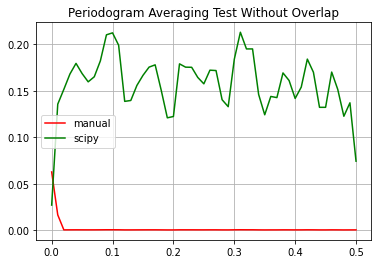

In [7]:
plt.plot(f_manual, manual_averaging, color = 'red', label = 'manual')
plt.plot(f, Pxx, color = 'green', label = 'scipy')
plt.legend()
plt.title('Periodogram Averaging Test Without Overlap')
plt.grid()
plt.show()

## Test with overlap

In [8]:
L2 = 70
K2 = 200
D2 = int(round(N/K2))

### Calculate averaged periodogram

In [9]:
# Custom periodogram averaging function
f_manual, manual_averaging2 = periodogram_averaging(data,K2,L2, window="hann")

# Scipy periodogram averaging function
f2, Pxx2 = welch(data, nperseg = L2, noverlap=L2-D2)

### Compare custom function with Scipy function

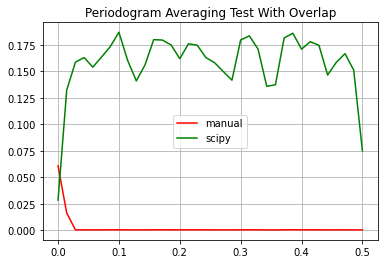

In [10]:
plt.plot(f_manual, manual_averaging2, color = 'red', label = 'manual')
plt.plot(f2, Pxx2, color = 'green', label = 'scipy')
plt.legend()
plt.title('Periodogram Averaging Test With Overlap')
plt.grid()
plt.show()

## Test with sinusoidal function

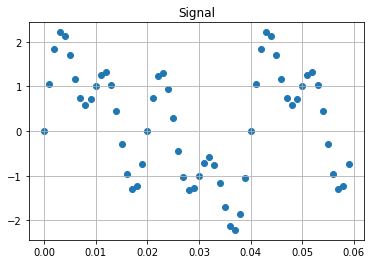

In [11]:
samplefreq = 1000 # Hz
sinfreq = 50 # Hz

# Generate 3 periods of sinusoidal sample signal
x = np.arange(0,3/sinfreq, 1/samplefreq)
y = np.sin(2*np.pi*sinfreq*x) + np.sin(np.pi*sinfreq*x) + np.sin(4*np.pi*sinfreq*x)
# Plot signal
plt.scatter(x,y)
plt.title('Signal')
plt.grid()
plt.show()

### Plot normal periodogram


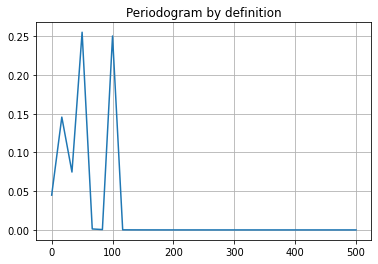

In [12]:
def_xf, def_yf = periodogram(y, use_autocorrelation=False)
plt.plot(def_xf*samplefreq, def_yf)
plt.title('Periodogram by definition')
plt.grid()
plt.show()

In [13]:
print(len(y))

60


### Test without overlap
#### Calculate averaged periodogram

In [14]:
L_sin = 10
N_sin = len(y)
K_sin = 6
D_sin = int(round(N_sin/K_sin))

# Custom periodogram averaging function
f_manual_sin, manual_averaging_sin = periodogram_averaging(y,K_sin,L_sin, window="hann")

# Scipy periodogram averaging function
f_sin, Pxx_sin = welch(y, nperseg = L_sin, noverlap=L_sin-D_sin,)

#### Compare custom function with Scipy function

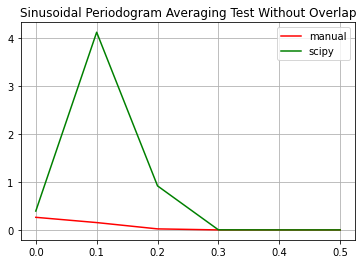

In [15]:
plt.plot(f_manual_sin, manual_averaging_sin, color = 'red', label = 'manual')
plt.plot(f_sin, Pxx_sin, color = 'green', label = 'scipy')
plt.legend()
plt.title('Sinusoidal Periodogram Averaging Test Without Overlap')
plt.grid()
plt.show()

### Test with overlap
#### Calculate averaged periodogram

In [16]:
L_sin2 = 10
N_sin2 = len(y)
K_sin2 = 8
D_sin2 = int(round(N_sin2/K_sin2))

# Custom periodogram averaging function
f_manual_sin2, manual_averaging_sin2 = periodogram_averaging(y,K_sin2,L_sin2, window="hann")

# Scipy periodogram averaging function
f_sin2, Pxx_sin2 = welch(y, nperseg = L_sin2, noverlap=L_sin2-D_sin2,)

#### Compare custom function with Scipy function

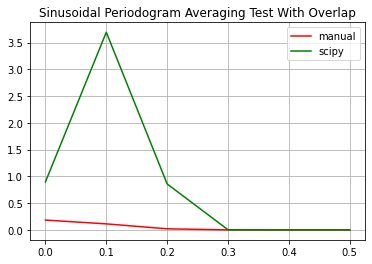

In [17]:
plt.plot(f_manual_sin2, manual_averaging_sin2, color = 'red', label = 'manual')
plt.plot(f_sin2, Pxx_sin2, color = 'green', label = 'scipy')
plt.legend()
plt.title('Sinusoidal Periodogram Averaging Test With Overlap')
plt.grid()
plt.show()